In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
# pd.options.display.max_rows = 999
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from pprint import pprint

In this exercise, we are going to use SVM to model a synthetic dataset with high accuracy.<br>

# Load dataset
- Load the banana matlab file using scipy.io
- The data consists of four set A, B, a, b, assign A as Xtrain, B as Xtest, a as ytrain and b as ytest.

In [2]:
# load data
import scipy.io


# Plot the dataset
- On the same graph, plot scatter diagram of both Xtrain and Xtest, use ytrain and ytest as color separation.

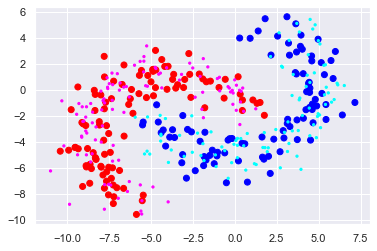

In [3]:
# scatter plot


# SVM modelling with linear kernel
- Using sklearn.svm with linear kernel and C=1, train a SVM model and check accuracy on test set.

In [4]:
# train and test with svm linear kernel
from sklearn import svm


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.815

The result is not bad. However, for a simple low dimensional dataset like this, we expect more. Let's see how we can advance our model for better performance.

# Investigate decision boundary
- Using similar method in Sec 3.1, plot the decision boundary of the classifier we trained with training points on a graph.

## Create meshgrid (for visualising contour)
- Use np.meshgrid to generate points on a rectange, the range of rectangle should be similar to the range of columns in Xtrain

In [5]:
# generate meshgrid xx and yy for showing decision contour
# set step size h=.02
h = .02


xx.shape (860, 979)
yy.shape (860, 979)


## Predict points on meshgrid
- Assign Z to the prediction of points on meshgrid, remember to flatten xx and yy and combine them to one array before passing to the model.
- Reshape Z to be same as xx/yy afterwards

In [6]:
# use the model we trained to predict result of all points on meshgrid


## Plot both training points and decision boundary
- Use ax.contourf() to plot contour of prediction results

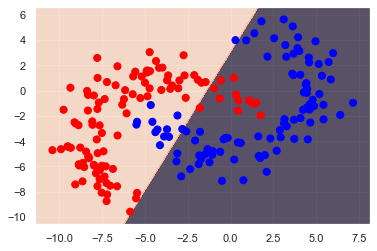

In [7]:
# plot contour


Now it's clear that how our model performs badly at data points around the middle of the graph. It is a <b>nonlinear boundary problem</b> but we are using linear boundary to handle it.

# Project data to higher dimension
- The data seems circular around (0, 0), let's use radial basis function to project the data and visualize the result.

## Create a radial basis function
- We want to know if projection of training data would produce linearly-separable points. First we need to construct the radial basis function.

In [8]:
# radial basis function
def rbf(X, gamma=1):
    """
    Args:
        X (numpy array): training data, dimension m x n
        gamma (float): kernel coefficient
        
    Returns:
        return the projected values of points, dimension m x 1
    """


In [9]:
# test rbf function
a = np.array([[1, 2], [3, 4]])
rbf(a)

array([0.10687793, 0.00673795])

## 3D plot of projected points
- Plot an interactive 3D graph consists of all projected training points to see if they are now linearly-separable or not.
- Hint: use mpl_toolkits.mplot3d

In [10]:
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

# plot_3D fucntion
def plot_3D(X, y, elev=30, azim=60, gamma=1.0):
    """
    Args:
        X (np array): feature
        y (np array): target
        elev (int): initial elevation angle of the view
        azim (int): initial azimuth angle of the view
        gamma (float): kernel coefficient
    """
    

# use interact widget to generate dynamic view
interact(plot_3D, elev=[10, 30], X=fixed(Xtrain), y=fixed(ytrain));     # need to fix X, y 

interactive(children=(Dropdown(description='elev', index=1, options=(10, 30), value=30), IntSlider(value=60, d…

- Play around with the 3D-plot by adjusting the gamma value
- Since our data is not exactly circular, some 'loosing' is required to make the two classes more linearly-separable. In this case we can try some gamma values smaller than 1 and see which one fits our purpose.

# Retrain SVM with rbf
- Now using sklearn svm, use kernel='rbf' with gamma=0.5 and see if the test score improves.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.99

- Reminder: when using radial basis kernel it is always require to tune parameter C and gamma to prevent overfitting or underfitting, basically the most practical way is to grid search over possible values.

Reference: https://ojskrede.github.io/inf4300/exercises/week_08/